# Introduction

- Good amount of Motivation has been taken from Prof. Axelrods Tournament for Prisoner's Dilemma (https://axelrod.readthedocs.io/en/stable/index.html)
- Veritasium (https://www.youtube.com/watch?v=mScpHTIi-kM) had also given us motivation to choose the topic as it was interesting, and we had tried to produce similar conclusions
- A much better file system has been written and the code (https://github.com/bhanu-kv/arms_race_modelling) is provided in github even though it won't be considered for grading we wanted to show how we can expand to visualize and take inputs via websites and the ease of writing strategies

# Strategies

- Defining Each Strategy as a Class which takes in previous own move, previous opponent move, round number
- Based on the previous moves the play function returns either Cooperation i.e. 'C' or Defection i.e. 'D'
- Each Strategy is Defined as Good, Moderate or Grim based on its approach

In [6]:
import random

# Alternates Between Cooperation and Defection every Round
class Alternator():
    def __init__(self):
        self.name = 'Alternator'
        self.strategy = 'Grim'
    
    def play(self, own_move, op_move, round):
        # Starts with either C or D
        if own_move == 'start':
            if random.random() < 0.5:
                return 'C'
            else:
                return 'D'
        
        # Plays Opposite of Last Move
        if own_move == 'C':
            return 'D'
        else:
            return 'C'

In [1]:
# Tries to Appease the Opponent by Cooperating when both Player and Opponent had Defected Last Round
class Appeaser():
    def __init__(self):
        self.name = 'Appeaser'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        # First Round Cooperation
        if round == 1:
            return 'C'
        else:
            self.own_history.append(own_move)
            self.op_history.append(op_move)

            # Tries Appeasing
            if self.op_history[-1] == 'D':
                if self.own_history[-1] == 'C':
                    return 'D'
                else:
                    return 'C'


In [2]:
# Initially Starts with Random 50% Probability of Cooperation or Defection
# If the Opponent Cooperates more then the Probability of Player Cooperating Increases
class AverageCopier():
    def __init__(self):
        self.name = 'AverageCopier'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
        self.op_cooperations = 0
    
    def play(self, own_move, op_move, round):
        # Starts with C or D randomly
        if round == 1:
            k = random.randint(0, 1)

            if k == 1:
                return 'C'
            else:
                return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if op_move == 'C':
            self.op_cooperations += 1

        # Increases probability of Cooperation if Opponent Cooperates
        p = self.op_cooperations / len(self.op_history)
        
        if random.random() > p:
            return 'D'
        else:
            return 'C'

In [3]:
# Starts with cooperation and continues unless overly provoked
class BenevolentTitan:
    def __init__(self):
        self.name = "Benevolent Titan"
        self.strategy = "Good"
        self.own_history = []
        self.op_history = []
        self.defections = 0
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        if self.op_history[-1] == 'D':
            self.defections += 1
            return 'C' if self.defections < 3 else 'D'  # Returns to cooperation after some time
        return 'C'


In [4]:
# As Rounds Increase it Cooperates More
class BetterAndBetter():
    def __init__(self):
        self.name = 'BetterAndBetter'
        self.strategy = 'Grim'
        self.own_history = []
        self.op_history = []
        self.op_cooperations = 0
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        p = len(self.op_history) / 100
        
        if random.random() < p:
            return 'D'
        else:
            return 'C'

In [5]:
# Always does the opposite of what the opponent does
class Contrarian:
    def __init__(self):
        self.name = "Contrarian"
        self.strategy = "Grim"
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)
        
        return 'D' if self.op_history[-1] == 'C' else 'C'

In [7]:
# Tends to cooperate but acknowledges accidental defections
class ContriteTitForTat:
    def __init__(self):
        self.name = "ContriteTitForTat"
        self.strategy = "Good"
        self.own_history = []
        self.op_history = []
        self.punishment = False
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif self.punishment:
            self.punishment = False
            return 'C'
        elif self.op_history[-1] == 'D' and own_move == 'D':
            self.punishment = True
            return 'D'
        else:
            return self.op_history[-1]


In [8]:
# Cooperates for 10 Rounds and then shifts to Tit for Tat
class Davis():
    def __init__(self):
        self.name = 'Davis'
        self.strategy = 'Good'
    
    def play(self, own_move, op_move, round):
        if round <= 10:
            return 'C'
        else:
            return op_move

In [9]:
# Always Defects
class Defector():
    def __init__(self):
        self.name = 'Defector'
        self.strategy = 'Grim'
    
    def play(self, own_move, op_move, round):
        return 'D'

In [10]:

class DoubleResurection():
    def __init__(self):
        self.name = 'DoubleResurection'
        self.strategy = 'Grim'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if len(self.own_history) >= 5 and self.own_history[-5:] == ['C', 'C', 'C', 'C', 'C']:
            return 'D'
        elif len(self.own_history) >= 5 and self.own_history[-5:] == ['D', 'D', 'D', 'D', 'D']:
            return 'C'
        else:
            return self.op_history[-1]

In [11]:
class Downing():
    def __init__(self):
        self.name = 'Downing'
        self.strategy = 'Moderate'
        self.op_history = []
        self.own_history = []
        self.number_opponent_C_in_response_to_C = 0
        self.number_opponent_C_in_response_to_D = 0

        self.cooperations = 0
        self.defections = 0
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'D'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if round == 2:
            if self.op_history[-1] == 'C':
                self.number_opponent_C_in_response_to_C += 1
            return 'D'

        if self.own_history[-2] == 'C' and self.op_history[-1] == 'C':
            self.number_opponent_C_in_response_to_C += 1
        if self.own_history[-2] == 'D' and self.op_history[-1] == 'C':
            self.number_opponent_C_in_response_to_D += 1

        # Adding 1 to cooperations for assumption that first opponent move
        # being a response to a cooperation. See docstring for more
        # information.
        alpha = self.number_opponent_C_in_response_to_C / (
            self.cooperations + 1
        )
        # Adding 2 to defections on the assumption that the first two
        # moves are defections, which may not be true in a noisy match
        beta = self.number_opponent_C_in_response_to_D / max(
            self.defections, 2
        )
        expected_value_of_cooperating = alpha * 3 + (1 - alpha) * 0
        expected_value_of_defecting = beta * 4 + (1 - beta) * 1

        if expected_value_of_cooperating > expected_value_of_defecting:
            return 'C'
        if expected_value_of_cooperating < expected_value_of_defecting:
            return 'D'
        return self.own_history[-1].flip()

In [12]:
class ForgivingGrudger:
    def __init__(self):
        self.name = "ForgivingGrudger"
        self.strategy = "Moderate"  # Will return to cooperation after defections
        self.own_history = []
        self.op_history = []
        self.triggered = False
        self.punishment_timer = 0
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        if self.op_history[-1] == 'D':
            self.triggered = True
            self.punishment_timer = 2  # Punish for 2 rounds
        if self.punishment_timer > 0:
            self.punishment_timer -= 1
            return 'D'
        return 'C'


In [13]:
class GrimTrigger:
    def __init__(self):
        self.name = "GrimTrigger"
        self.strategy = "Grim"  # Grim strategies involve long-term punishment for defection
        self.own_history = []
        self.op_history = []
        self.triggered = False
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round > 1 and self.op_history[-1] == 'D':
            self.triggered = True
        return 'D' if self.triggered else 'C'


In [14]:
import random

class GenerousTitForTat:
    def __init__(self):
        self.name = "GenerousTitForTat"
        self.strategy = "Good"  # More forgiving version of Tit for Tat
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif self.op_history[-1] == 'D':
            return 'C' if random.random() > 0.1 else 'D'  # Forgives 90% of defections
        else:
            return 'C'


In [15]:
import random

class ForgivingTitForTat:
    def __init__(self):
        self.name = "ForgivingTitForTat"
        self.strategy = "Good"  # Cooperates more often, forgives defections
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif self.op_history[-1] == 'D':
            return 'C' if random.random() > 0.2 else 'D'  # Forgives 80% of defections
        else:
            return 'C'


In [16]:
class Joss:
    def __init__(self):
        self.name = "Joss"
        self.strategy = "Grim"  # Mostly cooperative, but adds random defections
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        else:
            if random.random() < 0.1:
                return 'D'  # 10% chance of defection regardless of opponent's move
            return self.op_history[-1]


In [17]:
class Pavlov:
    def __init__(self):
        self.name = "Pavlov"
        self.strategy = "Moderate"
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        
        if round == 1:
            return 'C'  # Starts by cooperating
        elif own_move == op_move:
            return own_move  # Stay with cooperation if both cooperated
        else:
            return 'D' if own_move == 'C' else 'C'  # Defect if either player defected in the previous round


In [18]:
class Prober:
    def __init__(self):
        self.name = "Prober"
        self.strategy = "Grim"  # Mixes cooperation and defection to assess opponent
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        return 'C' if round % 4 != 0 else 'D'  # Defects every fourth round

In [19]:
class Provocateur:
    def __init__(self):
        self.name = "Provocateur"
        self.strategy = "Grim"  # Attempts to provoke a defection from the opponent
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        return 'D' if round % 3 == 0 else 'C'  # Defects every third round

In [20]:
class Random():
    def __init__(self):
        self.name = 'Random'
        self.strategy = 'Grim'
    
    def play(self, own_move, op_move, round):
        if random.random() > 0.5:
            return 'C'
        
        return 'D'

In [21]:
class Reputation:
    def __init__(self):
        self.name = "Reputation"
        self.strategy = "Good"  # Adjusts cooperation based on perceived opponent reputation
        self.own_history = []
        self.op_history = []
        self.cooperation_level = 0.5  # Initial cooperation level
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
            if self.op_history[-1] == 'C':
                self.cooperation_level = min(1, self.cooperation_level + 0.1)
            else:
                self.cooperation_level = max(0, self.cooperation_level - 0.1)
        if round == 1:
            return 'C'
        return 'C' if random.random() < self.cooperation_level else 'D'


In [22]:
class Resurection():
    def __init__(self):
        self.name = 'Resurection'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round == 1:
            return 'C'
        
        self.own_history.append(own_move)
        self.op_history.append(op_move)

        if len(self.own_history) >= 5 and self.own_history[-5:] == ['D', 'D', 'D', 'D', 'D']:
            return 'D'
        else:
            return self.op_history[-1]

In [23]:
class Sluggish:
    def __init__(self):
        self.name = "Sluggish"
        self.strategy = "Good"  # Responds to defections but with a delay
        self.own_history = []
        self.op_history = []
        self.defection_response = False
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        
        if round == 1:
            return 'C'
        
        if self.op_history[-1] == 'D':
            self.defection_response = True
            
        return 'D' if self.defection_response and round > 2 else 'C'


In [24]:
class TitForTat():
    def __init__(self):
        self.name = 'TitForTat'
        self.strategy = 'Good'
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if own_move == 'start':
            return 'C'

        self.op_history.append(op_move)
        return self.op_history[-1]

In [25]:
class TitForTwoTats:
    def __init__(self):
        self.name = "TitForTwoTats"
        self.strategy = "Good"  # A forgiving strategy, allows some defection before retaliating
        self.own_history = []
        self.op_history = []
    
    def play(self, own_move, op_move, round):
        if round > 1:
            self.own_history.append(own_move)
            self.op_history.append(op_move)
        if round == 1:
            return 'C'
        elif len(self.op_history) >= 2 and self.op_history[-1] == 'D' and self.op_history[-2] == 'D':
            return 'D'
        else:
            return 'C'


Taking in objects of all strategy classes and storing it in list

In [26]:
strategies = [Alternator(), Appeaser(), AverageCopier(), BenevolentTitan(), BetterAndBetter(), Contrarian(), ContriteTitForTat(), Davis(), Defector(), DoubleResurection(),
              Downing(), ForgivingGrudger(), ForgivingTitForTat(), GenerousTitForTat(), GrimTrigger(), Joss(), Pavlov(), Prober(), Provocateur(), Random(), Reputation(),
              Resurection(), Sluggish(), TitForTat(), TitForTwoTats()]

# Payoff

- Default payoff has been setup
- We can also take input from user for payoffs
- The payoff has been kept low due to high number of players and generations, if high payoff would've been kept then it would've caused overflow

In [27]:
class PayOffMatrix():
    def __init__(self, default=True):
        self.default = default
        self.default_payoff = {('C', 'C'): [0.03, 0.03],
                       ('C', 'D'): [0, 0.05],
                       ('D', 'C'): [0.05, 0],
                       ('D', 'D'): [0.01, 0.01]
                       }
    
    def return_payoff(self):
        if self.default == True:
            return self.default_payoff
        else:
            return self.user_define()

    def user_define(self):
        user_payoff = {}

        user_payoff[('C', 'C')] = input('What is the payoff for Cooperation and Cooperation?')
        user_payoff[('C', 'D')] = input('What is the payoff for Cooperation and Defection?')
        user_payoff[('D', 'C')] = input('What is the payoff for Defection and Cooperation?')
        user_payoff[('D', 'D')] = input('What is the payoff for Defection and Defection?')

        return user_payoff

# Defining a Game

- Game class has been defined which takes in all the strategies and plays and takes inputs of moves
- We have taken noise in account to model real-world miscommunication
- Visualize function has been setup to visualize what was the result of each round

In [28]:
import matplotlib.pyplot as plt
import random

class Game():
    def __init__(self, player1, player2, payoff, rounds, visualize = False, noise = 0):
        self.p1 = player1
        self.p2 = player2
        self.rounds = rounds
        self.payoff = payoff
        self.visualize = visualize
        self.noise = noise
    
    def play(self):
        p1_score = 0
        p2_score = 0

        p1_history = []
        p2_history = []

        # Play first move
        p1Move = self.p1.play(own_move = 'start', op_move = 'C', round = 1)
        p2Move = self.p2.play(own_move = 'start', op_move = 'C', round = 1)

        # Rewards for Whatever was played in the round
        for round in range(2, self.rounds+1):
            if p1Move == 'C' and p2Move =='C':  
                p1_score += self.payoff['C', 'C'][0]
                p2_score += self.payoff['C', 'C'][1]

            elif p1Move == 'C' and p2Move =='D':
                p1_score += self.payoff['C', 'D'][0]
                p2_score += self.payoff['C', 'D'][1]

            elif p1Move == 'D' and p2Move =='C':
                p1_score += self.payoff['D', 'C'][0]
                p2_score += self.payoff['D', 'C'][1]
            
            elif p1Move == 'D' and p2Move =='D':
                p1_score += self.payoff['D', 'D'][0]
                p2_score += self.payoff['D', 'D'][1]
            
            # Note player history
            p1_history.append(p1Move)
            p2_history.append(p2Move)

            # Note previous moves
            prev_p1Move = p1Move
            prev_p2Move = p2Move

            # Noise introduced to make the problem real world
            if random.random() < self.noise:
                if random.random() < 0.5:
                    if prev_p1Move == 'C':
                        prev_p1Move = 'D'
                else:
                    if prev_p2Move == 'C':
                        prev_p2Move = 'D'
            
            # Play next move
            p1Move = self.p1.play(prev_p1Move, prev_p2Move, round)
            p2Move = self.p2.play(prev_p2Move, prev_p1Move, round)
        
        # Visualization of what happened in each game
        self.visualize_result(self.visualize, p1_history=p1_history, p2_history=p2_history)
    
        if self.visualize == True:
            # Who beats who
            if p1_score>p2_score:
                print(self.p1.name,'beats',self.p2.name,p1_score,'-',p2_score)
            elif p2_score>p1_score:    
                print(self.p2.name,'beats',self.p1.name,p2_score,'-',p1_score)
            else:
                print('it was a draw',self.p1.name,p1_score,self.p2.name,p2_score)
        
        return p1_score, p2_score
    
    # Function to plot circles
    def add_circle(self, ax, color, x, y):
        circle = plt.Circle((x, y), 0.1, color=color)
        ax.add_artist(circle)

    def visualize_result(self, visualize, p1_history, p2_history):
        if visualize == False:
            return
        
        # Initialize figure and axes for two rows
        fig, axs = plt.subplots(2, 1, figsize=(5, 5))
        plt.xlim(0, self.rounds-1)
        plt.ylim(0, 1)

        # Iteratively add circles to two rows
        for round in range(self.rounds-1):
            if p1_history[round] == 'C':
                c1 = 'green'
            else:
                c1 = 'red'
            
            if p2_history[round] == 'C':
                c2 = 'green'
            else:
                c2 = 'red'

            # Add red circle in the first row
            self.add_circle(axs[0], c1, round, 0.5)
            
            # Add green circle in the second row
            self.add_circle(axs[1], c2, round, 0.5)

        # Set limits and aspect ratio
        for ax in axs:
            ax.set_xlim(0, self.rounds)
            ax.set_ylim(0, 1)
            ax.set_aspect('equal')

        plt.show()

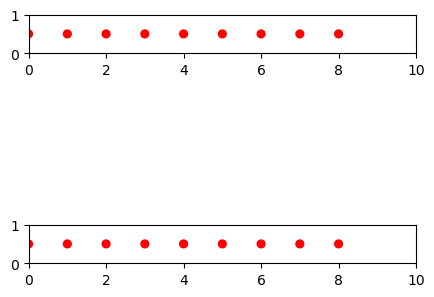

it was a draw Downing 0.09 Defector 0.09


(0.09, 0.09)

In [29]:
payoff_mat = PayOffMatrix().return_payoff()
game = Game(player1=Downing(), player2=Defector(), payoff=payoff_mat, rounds=10, visualize=True)
game.play()

# Defining a Tournament

In [30]:
import collections
import operator

class EvolutionaryTournament:
    def __init__(self, games, rounds, noise, generations, mutation, list_strats, repeat):
        self.generations = generations
        self.rounds = rounds
        self.noise = noise
        self.games = games
        self.mutation_probab = mutation
        self.list_strats = list_strats
        self.repeat = repeat
        self.strategies = self.initialize_population()
        
    def initialize_population(self):
        strategies = []
        repeat_strats = self.repeat

        for strat in self.list_strats:
            for i in range(repeat_strats):
                strategies.append(strat)
        
        self.population_history = {}
        self.norm_population_history = {}

        for strat in self.list_strats:
            self.population_history[f'{strat.name}'] = []
            self.norm_population_history[f'{strat.name}'] = []
        
        return strategies

    def play(self):
        for generation in range(1, self.generations+1):
            scores = {player.name: 0 for player in self.list_strats}
            object_scores = {player: 0 for player in self.list_strats}

            counter = collections.Counter(self.strategies)
            
            # Plays multiple games, just so that the results are not random
            for game in range(self.games):
                # Play every strategy
                for i in range(len(self.list_strats)):
                    for j in range(i + 1, len(self.list_strats)):
                        # Get Payoff Matrix
                        payoff_mat = PayOffMatrix().return_payoff()

                        # Play Game
                        game = Game(
                            player1=self.list_strats[i],
                            player2=self.list_strats[j],
                            payoff=payoff_mat,
                            rounds=self.rounds,
                            visualize=False,
                            noise=self.noise
                        )
                        s1, s2 = game.play()

                        # Increase Score for each strategy (multiply it with number of same strategies, this is done for better computation complexity)
                        scores[self.list_strats[i].name] += s1*counter[self.list_strats[i]]
                        scores[self.list_strats[j].name] += s2*counter[self.list_strats[j]]

            # Get population size of each strategy
            for player in counter:
                self.population_history[player.name].append(counter[player])
                self.norm_population_history[player.name].append(counter[player]/len(self.strategies))

            # Print Generation
            print("Generation: ", generation)

            # Normalize Score
            for player in self.list_strats:
                if counter[player] == 0:
                    continue
                    
                scores[player.name] /= counter[player]

            # Evolution for each generation
            self.evolve(scores)
            
            self.scores = scores
            self.object_scores = object_scores

    def evolve(self, scores):
        # Step 1: Calculate the average score of all strategies
        total_score = sum(scores.values())
        average_score = total_score / len(self.list_strats) if total_score > 0 else 1  # Avoid division by zero
        
        # Step 2: Calculate the fitness of each strategy relative to the average score
        fitness = {player.name: (scores[player.name] / average_score) for player in self.list_strats}
        
        # Step 3: Calculate the new frequency for each strategy based on fitness
        counter = collections.Counter(self.strategies)
        total_population = len(self.strategies)
        
        new_population = []
        
        for player in self.list_strats:
            if counter[player] > 0:
                # Update frequency based on fitness; a player with higher fitness gets more representation
                new_frequency = int(fitness[player.name] * counter[player])
                new_population.extend([player] * new_frequency)
        
        # Step 4: Handle cases where some strategies may lose all their population
        # Ensuring at least 1 individual remains for diversity (optional)
        if len(new_population) < total_population:
            while len(new_population) < total_population:
                new_population.append(random.choice(self.list_strats))  # Randomly fill with any strategy
        
        # Step 5: Set the new population
        self.strategies = new_population
        
        # Step 6: Apply mutation to introduce diversity
        self.mutate_population()

    def mutate_population(self):
        # Mutate
        for i in range(len(self.strategies)):
            # Mutate each strategy with a certain probability
            if random.random() < self.mutation_probab:
                new_strategy = random.choice(self.list_strats)
                self.strategies[i] = new_strategy

    def show_final_result(self):
        current_population = {player.name: 0 for player in self.list_strats}
        
        for player in self.list_strats:
            current_population[player.name] = self.population_history[player.name][-1]

        current_population = dict(sorted(current_population.items(), key=lambda item: item[1], reverse=True))

        for player in current_population.keys():
            print(f"{player}:", current_population[player])
    
    def plot_norm_population_history(self):
        fig = plt.figure(figsize=(30, 15), dpi=80)
        for key, list in self.norm_population_history.items():
            plt.plot(list, label=key)
        
        plt.title('Normalized Population of Strategies')
        plt.ylabel('Population Size')
        plt.xlabel('Generations')
        plt.legend()
        plt.plot()

    def plot_population_history(self):
        fig = plt.figure(figsize=(30, 15), dpi=80)
        for key, list in self.population_history.items():
            plt.plot(list, label=key)
        
        plt.title('Population of Strategies')
        plt.ylabel('Population Size')
        plt.xlabel('Generations')
        plt.legend()
        plt.plot()

In [31]:
tournament = EvolutionaryTournament(games=5, rounds=200, noise=0.000, generations=100, mutation=0.001, list_strats=strategies, repeat = 100)
tournament.play()

Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
Generation:  20
Generation:  21
Generation:  22
Generation:  23
Generation:  24
Generation:  25
Generation:  26
Generation:  27
Generation:  28
Generation:  29
Generation:  30
Generation:  31
Generation:  32
Generation:  33
Generation:  34
Generation:  35
Generation:  36
Generation:  37
Generation:  38
Generation:  39
Generation:  40
Generation:  41
Generation:  42
Generation:  43
Generation:  44
Generation:  45
Generation:  46
Generation:  47
Generation:  48
Generation:  49
Generation:  50
Generation:  51
Generation:  52
Generation:  53
Generation:  54
Generation:  55
Generation:  56
Generation:  57
Generation:  58
Generation:  59
Generation:  60
Generation:  61
Generation:  62
Generation:  63
G

In [32]:
tournament.show_final_result()

Davis: 5683461
ContriteTitForTat: 1438893
Resurection: 568209
GrimTrigger: 96010
Defector: 95970
BetterAndBetter: 86107
Downing: 81578
Sluggish: 67828
Benevolent Titan: 61140
Alternator: 54012
Pavlov: 51548
TitForTwoTats: 35441
Provocateur: 19373
TitForTat: 11804
Prober: 4676
Random: 4096
DoubleResurection: 3779
AverageCopier: 3777
Contrarian: 3608
ForgivingGrudger: 2791
ForgivingTitForTat: 2768
GenerousTitForTat: 2324
Reputation: 2265
Joss: 1828
Appeaser: 428


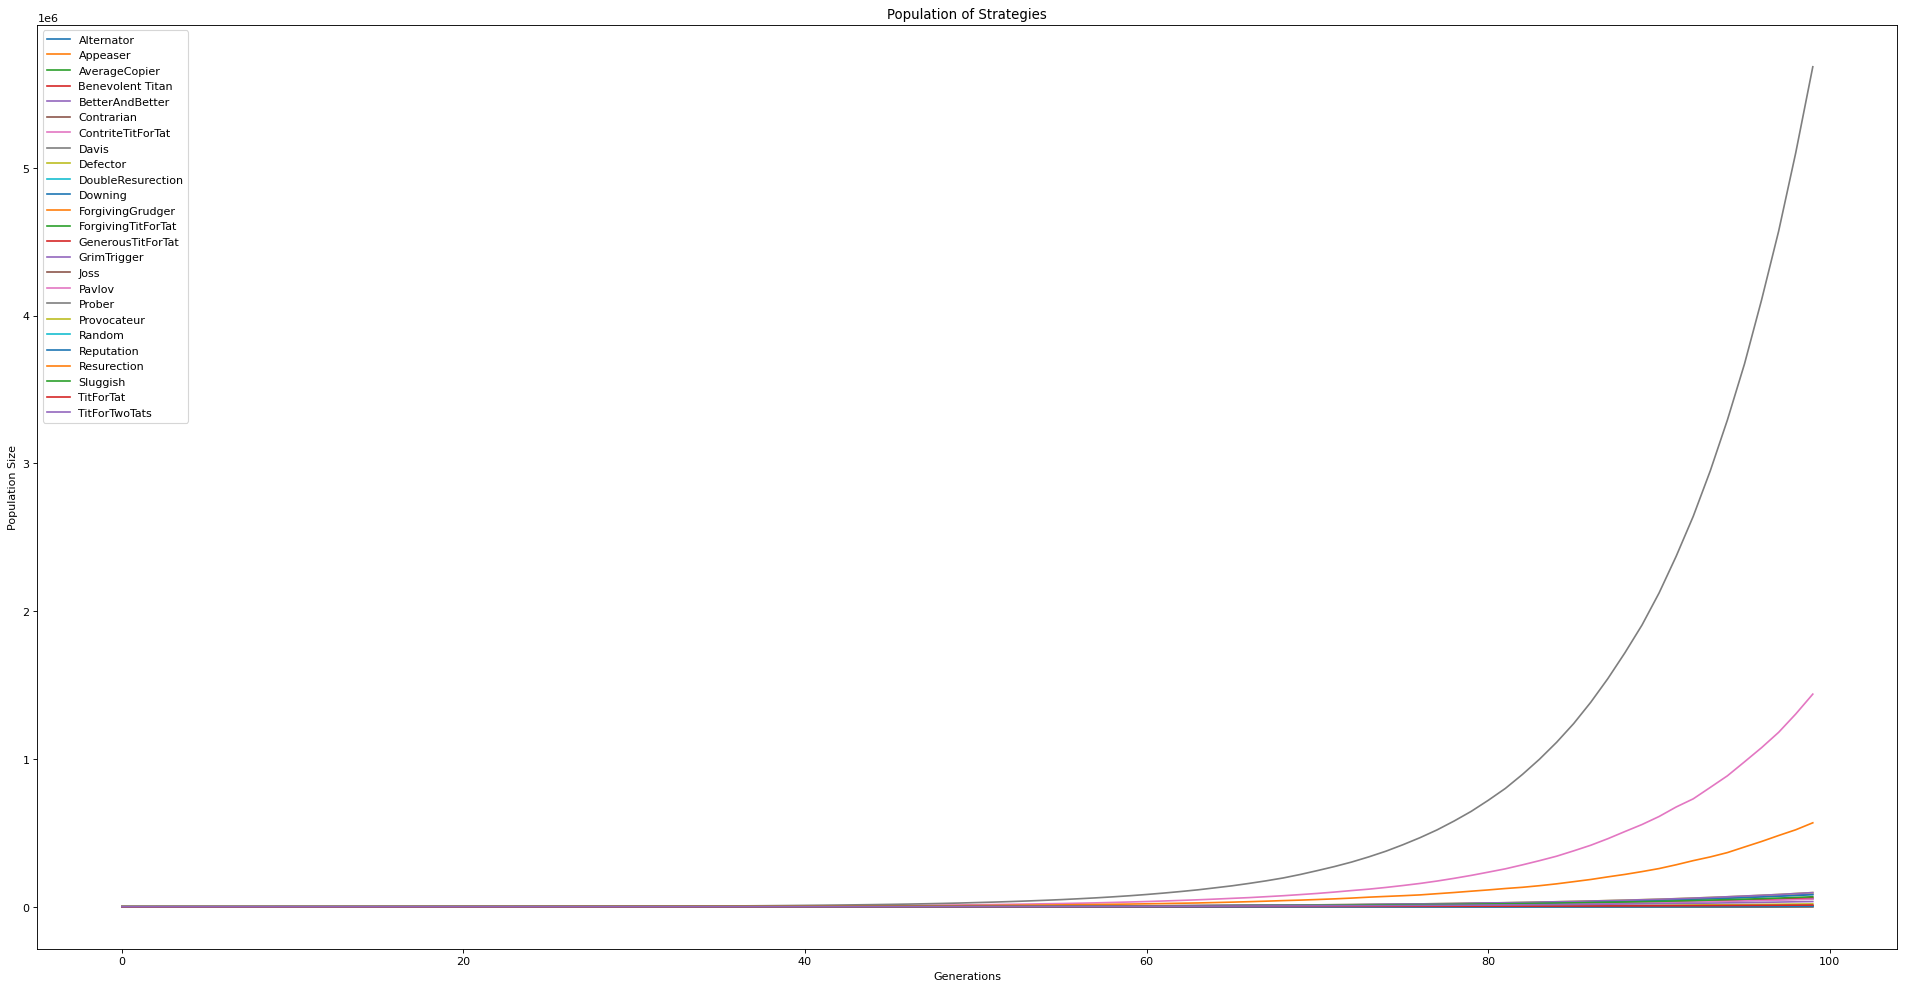

In [33]:
tournament.plot_population_history()

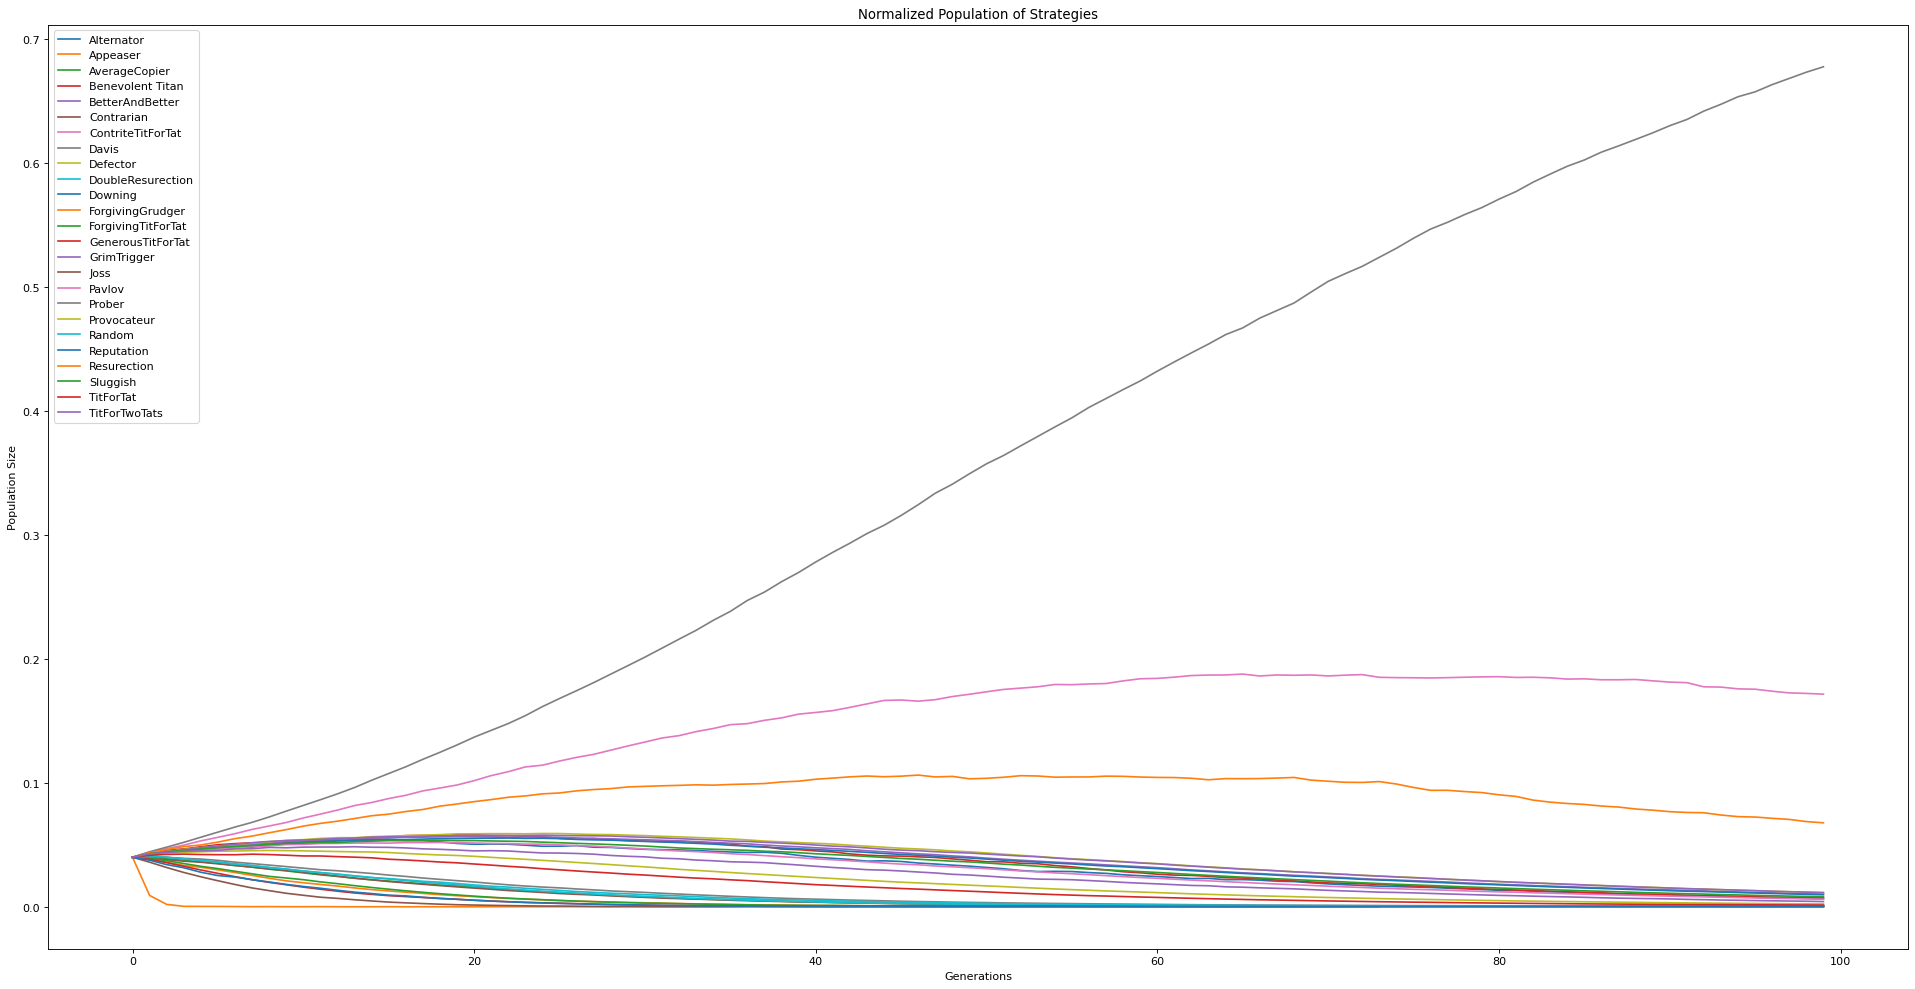

In [34]:
tournament.plot_norm_population_history()

In [35]:
tournament = EvolutionaryTournament(games=5, rounds=200, noise=0.001, generations=100, mutation=0.001, list_strats=strategies, repeat = 100)
tournament.play()

Generation:  1
Generation:  2
Generation:  3
Generation:  4
Generation:  5
Generation:  6
Generation:  7
Generation:  8
Generation:  9
Generation:  10
Generation:  11
Generation:  12
Generation:  13
Generation:  14
Generation:  15
Generation:  16
Generation:  17
Generation:  18
Generation:  19
Generation:  20
Generation:  21
Generation:  22
Generation:  23
Generation:  24
Generation:  25
Generation:  26
Generation:  27
Generation:  28
Generation:  29
Generation:  30
Generation:  31
Generation:  32
Generation:  33
Generation:  34
Generation:  35
Generation:  36
Generation:  37
Generation:  38
Generation:  39
Generation:  40
Generation:  41
Generation:  42
Generation:  43
Generation:  44
Generation:  45
Generation:  46
Generation:  47
Generation:  48
Generation:  49
Generation:  50
Generation:  51
Generation:  52
Generation:  53
Generation:  54
Generation:  55
Generation:  56
Generation:  57
Generation:  58
Generation:  59
Generation:  60
Generation:  61
Generation:  62
Generation:  63
G

In [36]:
tournament.show_final_result()

Davis: 3568946
ContriteTitForTat: 632653
Resurection: 384439
GrimTrigger: 120242
Defector: 114753
BetterAndBetter: 99236
Downing: 97846
Sluggish: 83003
Alternator: 57366
Benevolent Titan: 43053
Pavlov: 37714
TitForTwoTats: 34871
Provocateur: 20580
TitForTat: 8430
Prober: 3523
Random: 2949
AverageCopier: 2697
Contrarian: 2589
DoubleResurection: 2582
ForgivingTitForTat: 1813
ForgivingGrudger: 1768
GenerousTitForTat: 1635
Reputation: 1469
Joss: 1183
Appeaser: 258


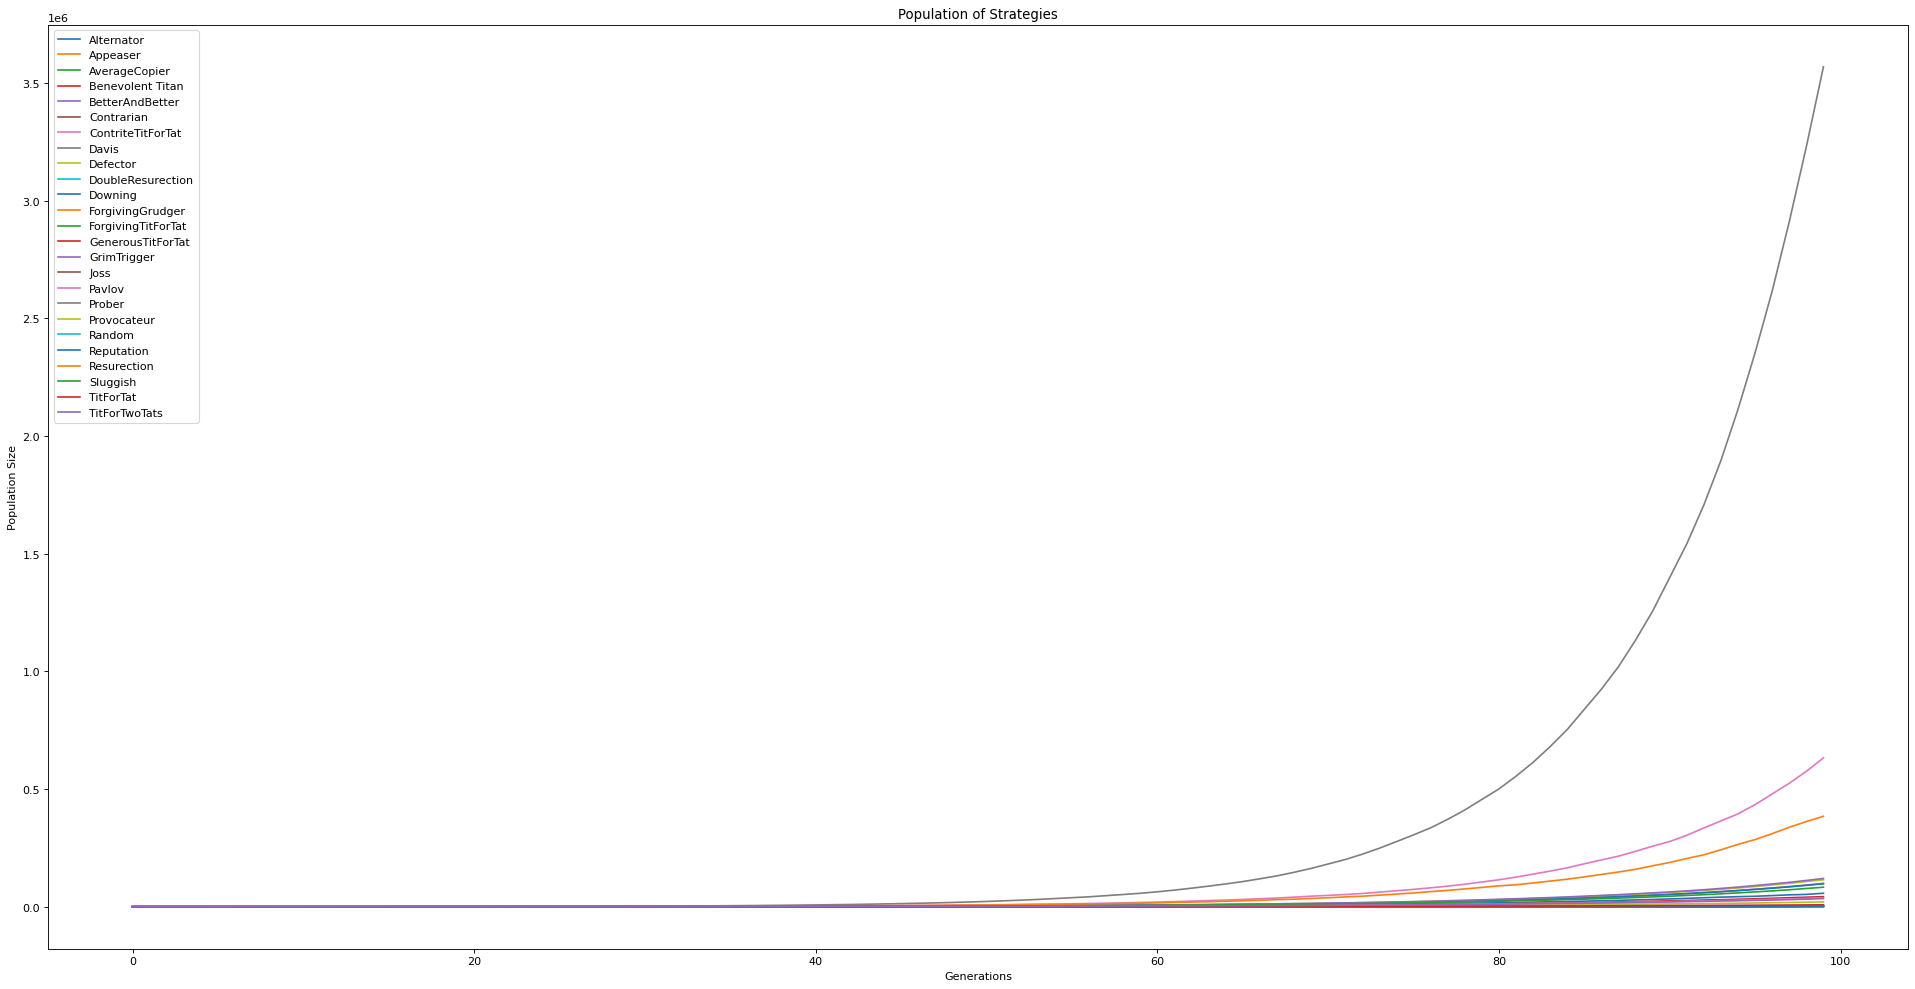

In [37]:
tournament.plot_population_history()

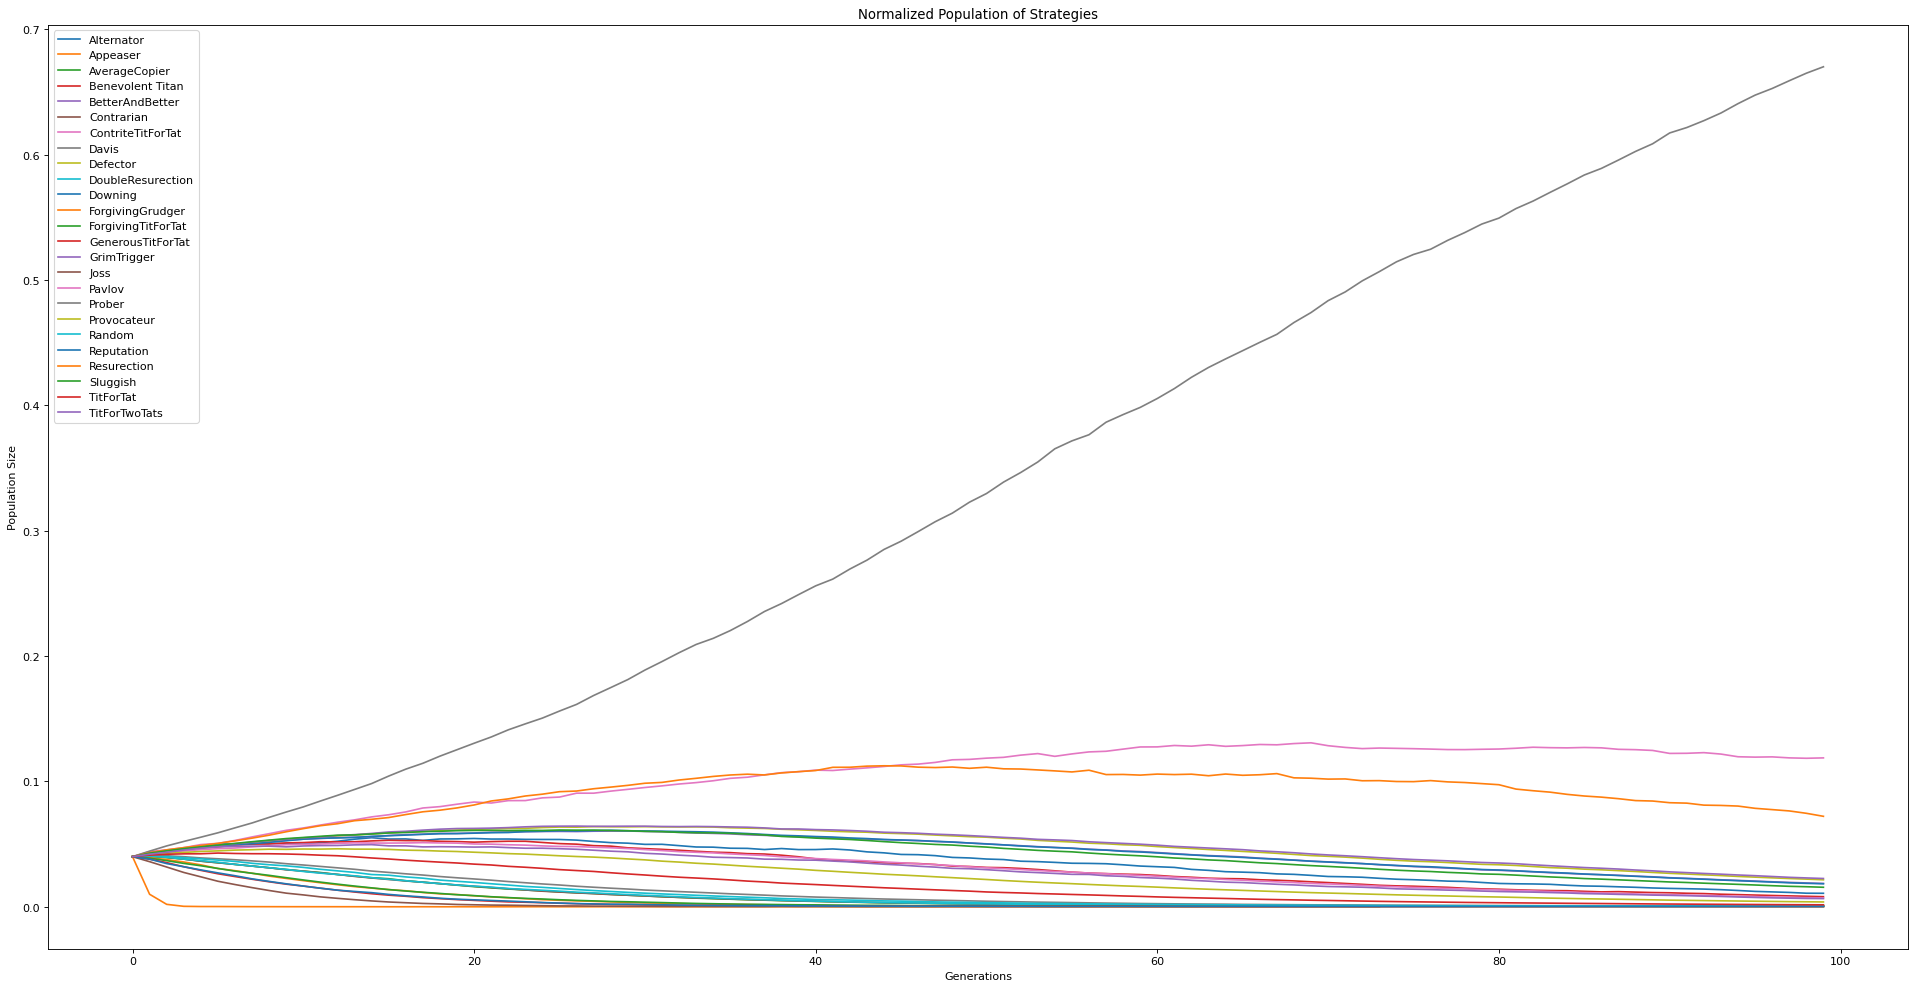

: 

In [38]:
tournament.plot_norm_population_history()

# Conclusions

- We can see that the top strategies turn out to be ones that are moderate
- These strategies are the ones which have good amount of retaliation and are not 'pushover'
- Strategies that are 'pushover' i.e. do not punish opponent appropriately go down in population quickly
- By introduction of noise we have also observed that strategies which also have good amount of forgiving nature do better than those who go for all-out punishment